##Task 2

Hojin lee (hl3328) & Hyuk Joon Kwon (hk3084)

In [4]:
cnn = Sequential()
cnn.add(Conv2D(4, kernel_size =(3,3), activation ='relu', input_shape = (64,64,1),padding = 'same'))
cnn.add(Conv2D(4, kernel_size =(3,3), activation ='relu',padding = 'same'))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Conv2D(8, kernel_size =(3,3), activation ='relu',padding = 'same'))
cnn.add(Conv2D(8, kernel_size =(3,3), activation ='relu',padding = 'same'))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Flatten())
cnn.add(Dense(5, activation = 'softmax'))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 4)         40        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 4)         148       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 8)         296       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [0]:
model = Sequential()
model.add(Dense(256, input_shape=(4,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


In [3]:
cnn = Sequential()
cnn.add(Conv2D(4, kernel_size =(3,3), activation ='relu', input_shape = (16,16,1),padding = "same" ))
cnn.add(Conv2D(4, kernel_size =(3,3), activation ='relu',padding = "same"))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Flatten())

cnn.add(Dense(2, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 4)         40        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 4)         148       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 4)           0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 514       
Total params: 702
Trainable params: 702
Non-trainable params: 0
_________________________________________________________________


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_digits

#from keras.datasets import mnist
from tensorflow import keras 
from tensorflow.keras import regularizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

#downloading kerastuner
!pip install -U keras-tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters


     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=c38f0d700e1ea14f939f702e129fd2b10a17dfe358b8c84d0960fb4d0ce9fa37
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=6db84e35dea5d45b15791849ca235de2313e524f23a72bd256a6b2878a225123
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
#downloading fashion mnist dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


4423680/4422102 [==============================] - 0s 0us/step


Creating a multilayer perceptron fully connected neural network on fashion_mnist data set. (Vanilla model)

In [0]:
def create_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int("n_layers",1,4)):
      model.add(Dense(units=hp.Int('units',
                                          min_value=32,
                                          max_value=512,
                                          step=64),
                            activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [0]:
LOG_DIR = f"{int(time.time())}"
tuner = RandomSearch(
    create_model, 
    objective='val_accuracy', 
    max_trials=2, 
    executions_per_trial=2,
    directory=LOG_DIR
    )

tuner.search(
    x=X_train, 
    y=y_train,
    epochs=2,
    batch_size=64,
    validation_data=(X_val, y_val))

Epoch 1/2
797/797 [==============================] - 2s 3ms/step - loss: 0.7252 - accuracy: 0.7707 - val_loss: 0.5427 - val_accuracy: 0.8184
Epoch 2/2
797/797 [==============================] - 2s 3ms/step - loss: 0.4787 - accuracy: 0.8388 - val_loss: 0.4730 - val_accuracy: 0.8404
Epoch 1/2
797/797 [==============================] - 2s 3ms/step - loss: 0.7148 - accuracy: 0.7743 - val_loss: 0.5312 - val_accuracy: 0.8250
Epoch 2/2
797/797 [==============================] - 2s 3ms/step - loss: 0.4756 - accuracy: 0.8418 - val_loss: 0.4759 - val_accuracy: 0.8407


Epoch 1/2
797/797 [==============================] - 2s 3ms/step - loss: 0.5333 - accuracy: 0.8152 - val_loss: 0.4575 - val_accuracy: 0.8432
Epoch 2/2
797/797 [==============================] - 2s 3ms/step - loss: 0.4102 - accuracy: 0.8533 - val_loss: 0.4323 - val_accuracy: 0.8471
Epoch 1/2
797/797 [==============================] - 2s 3ms/step - loss: 0.5300 - accuracy: 0.8145 - val_loss: 0.4691 - val_accuracy: 0.8309
Epoch 2/2
797/797 [==============================] - 2s 3ms/step - loss: 0.4115 - accuracy: 0.8521 - val_loss: 0.4309 - val_accuracy: 0.8456


INFO:tensorflow:Oracle triggered exit


Learning curves for accuracy vs. epochs.

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

141/141 [==============================] - 0s 4ms/step - loss: 0.8919 - accuracy: 0.7130 - val_loss: 0.5274 - val_accuracy: 0.8130
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.8129 - val_loss: 0.5186 - val_accuracy: 0.8080
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4665 - accuracy: 0.8310 - val_loss: 0.4874 - val_accuracy: 0.8380
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.43

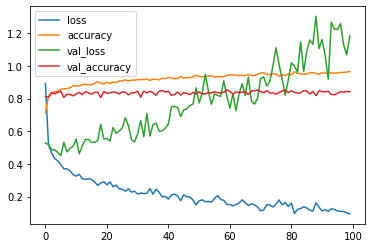

In [0]:
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)
history_callback = model.fit(X_test, y_test, batch_size=64, epochs=100, verbose=1,validation_split=0.1)
pd.DataFrame(history_callback.history).plot()

Creating a multilayer perceptron fully connected neural network on fashion_mnist data set. (With batach normalization)

In [0]:
def create_model_batchnormalization(hp):
    model = keras.Sequential()
    for i in range(hp.Int("n_layers",1,4)):
      model.add(Dense(units=hp.Int('units',
                                          min_value=32,
                                          max_value=512,
                                          step=64),
                            activation='relu'))
      model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

Creating a multilayer perceptron fully connected neural network on fashion_mnist data set. (with dropout)

In [0]:
def create_model_dropout(hp):
    model = keras.Sequential()
    for i in range(hp.Int("n_layers",1,4)):
      model.add(Dense(units=hp.Int('units',
                                          min_value=32,
                                          max_value=512,
                                          step=64),
                            activation='relu'))
      model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

Hyperparamter tuning the batch normalization model. The best model has a learning rate of 0.001, 3 layers and a hidden layer of size 416 

In [0]:
LOG_DIR = f"{int(time.time())}"
tuner_bn = RandomSearch(
    create_model_batchnormalization, 
    objective='val_accuracy', 
    max_trials=2, 
    executions_per_trial=2,
    directory=LOG_DIR
    )

tuner_bn.search(
    x=X_train, 
    y=y_train,
    epochs=2,
    batch_size=64,
    validation_data=(X_val, y_val))


Epoch 1/2
797/797 [==============================] - 3s 3ms/step - loss: 0.5898 - accuracy: 0.7969 - val_loss: 0.4387 - val_accuracy: 0.8471
Epoch 2/2
797/797 [==============================] - 3s 3ms/step - loss: 0.4081 - accuracy: 0.8580 - val_loss: 0.3948 - val_accuracy: 0.8622
Epoch 1/2
797/797 [==============================] - 3s 3ms/step - loss: 0.5939 - accuracy: 0.7978 - val_loss: 0.4509 - val_accuracy: 0.8434
Epoch 2/2
797/797 [==============================] - 3s 3ms/step - loss: 0.4065 - accuracy: 0.8583 - val_loss: 0.4187 - val_accuracy: 0.8558


Epoch 1/2
797/797 [==============================] - 4s 5ms/step - loss: 0.4830 - accuracy: 0.8281 - val_loss: 0.5465 - val_accuracy: 0.8022
Epoch 2/2
797/797 [==============================] - 4s 5ms/step - loss: 0.3816 - accuracy: 0.8581 - val_loss: 0.4346 - val_accuracy: 0.8416
Epoch 1/2
797/797 [==============================] - 4s 5ms/step - loss: 0.4843 - accuracy: 0.8274 - val_loss: 0.4257 - val_accuracy: 0.8429
Epoch 2/2
797/797 [==============================] - 4s 5ms/step - loss: 0.3757 - accuracy: 0.8622 - val_loss: 0.3940 - val_accuracy: 0.8599


INFO:tensorflow:Oracle triggered exit


Tesing the model with the best params above. The accuracy is around 85 percent. There seems to be some overfitting going on. 

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

141/141 [==============================] - 1s 4ms/step - loss: 0.9201 - accuracy: 0.6841 - val_loss: 1.0375 - val_accuracy: 0.7640
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.5911 - accuracy: 0.7996 - val_loss: 0.6709 - val_accuracy: 0.8190
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.8224 - val_loss: 0.5473 - val_accuracy: 0.8250
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.46

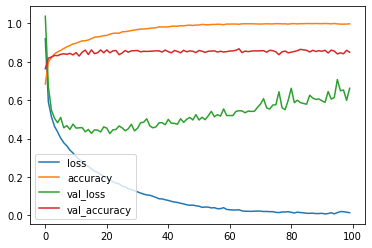

In [0]:
best_hp_bn = tuner_bn.get_best_hyperparameters()[0]
model_bn = tuner_bn.hypermodel.build(best_hp_bn)
history_callback_bn = model_bn.fit(X_test, y_test, batch_size=64, epochs=100, verbose=1,validation_split=0.1)
pd.DataFrame(history_callback_bn.history).plot()

Hyperparamter tuning the model that includes dense.

In [0]:
LOG_DIR = f"{int(time.time())}"
tuner_do = RandomSearch(
    create_model_dropout, 
    objective='val_accuracy', 
    max_trials=2, 
    executions_per_trial=2,
    directory=LOG_DIR
    )

tuner_do.search(
    x=X_train, 
    y=y_train,
    epochs=2,
    batch_size=64,
    validation_data=(X_val, y_val))


Using the Best Parameters to evaluate the model on the test set. Test accuracy is around 86 percent

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

141/141 [==============================] - 1s 4ms/step - loss: 1.4744 - accuracy: 0.4384 - val_loss: 0.7548 - val_accuracy: 0.6690
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.8577 - accuracy: 0.6697 - val_loss: 0.6411 - val_accuracy: 0.7510
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.7465 - accuracy: 0.7253 - val_loss: 0.5810 - val_accuracy: 0.7850
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.69

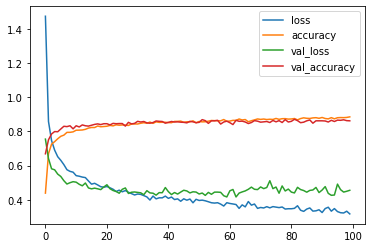

In [0]:
best_hp_do = tuner_do.get_best_hyperparameters()[0]
model_do = tuner_do.hypermodel.build(best_hp_do)
history_callback_do = model_do.fit(X_test, y_test, batch_size=64, epochs=100, verbose=1,validation_split=0.1)
pd.DataFrame(history_callback_do.history).plot()